# Part 1: Data Preprocessing

## 1. Data cleansing

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

First need to import the data:

In [26]:
path = "chimera_data_not_cleaned.csv"
df = pd.read_csv(path, sep = ",")
df.head()

,admin_support,age,boss_survey,boss_tenure,city_size,clock_in,core,education,gender,half_day_leaves,...,remote,salary,subordinates,team_size,tenure,tenure_unit,training,variable_pay,years_since_promotion,exit
0,0.0,41.0,0.456427,3.0,4.3,0.0,0.0,3.0,0.0,5.0,...,1.0,31.823364,0.0,8.0,1.0,1.0,3.0,2.0,3.0,0.0
1,2.0,41.0,0.512982,3.0,9.4,1.0,1.0,1.0,1.0,5.0,...,1.0,37.876808,1.0,5.0,1.0,1.0,2.0,8.0,4.0,0.0
2,0.0,33.0,0.415119,3.0,4.3,1.0,0.0,1.0,0.0,2.0,...,1.0,35.271042,0.0,8.0,1.0,1.0,2.0,2.0,3.0,0.0
3,0.0,35.0,0.467731,4.0,2.2,1.0,1.0,1.0,0.0,3.0,...,0.0,33.899048,0.0,8.0,1.0,1.0,3.0,2.0,3.0,0.0
4,0.0,28.0,0.685366,3.0,2.2,0.0,1.0,1.0,0.0,3.0,...,0.0,33.165573,0.0,6.0,1.0,1.0,2.0,3.0,4.0,0.0


Plot a histogram of the `age` column of the dataset. Do the values look reasonable to you? Do the same for `salary`.

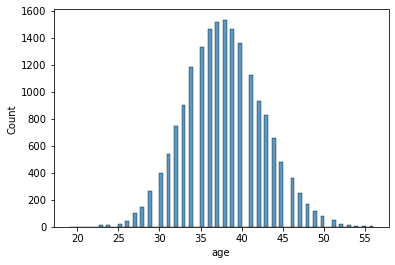

In [27]:
sns.histplot(df["age"],kde=False)
plt.show()

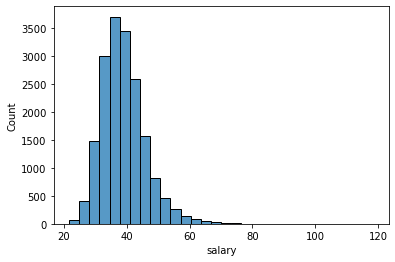

In [28]:
sns.histplot(df["salary"],kde=False,bins=30)
plt.show()

Use the function `.unique()` to take a look at the values taken on by `education`, `years_since_promotion`, and `exit`.

In [29]:
df["education"].unique()

array([ 3.,  1.,  2., nan])

In [30]:
df["years_since_promotion"].unique()

array([ 3.,  4.,  2.,  5.,  6.,  1., nan])

In [31]:
df['exit'].unique()

array([ 0.,  1., nan])

Use the function `.duplicated()` and conditioning to to detect if there are any duplicates.

In [32]:
dups = df.duplicated() #checks each row of the dataset and returns TRUE or FALSE depending on whether it is a duplicate
print(dups.any()) #returns TRUE if there is any value in dups that is equal to TRUE
print(df[dups]) #returns the problematic row

True
       admin_support   age  boss_survey  boss_tenure  city_size  clock_in  \
3193             0.0  29.0     0.630147          3.0        9.4       0.0   
4241             0.0  36.0     0.307587          4.0        9.4       0.0   
5060             1.0  45.0     0.191950          3.0        2.2       0.0   
7359             2.0  39.0     0.389368          4.0        4.3       0.0   
7388             1.0  41.0     0.517580          3.0        4.3       0.0   
8179             0.0  31.0     0.239316          3.0        9.4       1.0   
8231             2.0  48.0     0.199920          4.0        9.4       0.0   
9516             0.0  36.0     0.289320          3.0        6.1       1.0   
9734             0.0  32.0     0.604804          3.0        9.4       0.0   
9953             2.0  34.0     0.607056          4.0        9.4       0.0   
9993             0.0  37.0     0.161958          3.0        9.4       1.0   
12278            0.0  34.0     0.630454          5.0        9.4       1

Use the function `.drop_duplicates(inplace=True)` to obtain a new dataset with no duplicates.

In [33]:
print(df.shape) #gives current size of dataset
df.drop_duplicates(inplace=True) # delete duplicate rows
print(df.shape)

(18149, 26)
(18132, 26)


In [34]:
df.columns.duplicated()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False])

Use the function `.isna()` and conditioning to detect if there are any empty cells.

In [35]:
df.isna().any()

admin_support             True
age                       True
boss_survey               True
boss_tenure               True
city_size                 True
clock_in                  True
core                      True
education                 True
gender                    True
half_day_leaves           True
high_potential            True
job_satisfaction          True
kpi_performance           True
local                    False
part_time                 True
rank                      True
remote                    True
salary                    True
subordinates              True
team_size                 True
tenure                    True
tenure_unit               True
training                  True
variable_pay              True
years_since_promotion     True
exit                      True
dtype: bool

If we want to drop entire rows with NA values, we can simply use
`df.dropna(axis = 0,how="any")`

In [36]:
df.dropna(axis = 0,how="any")

,admin_support,age,boss_survey,boss_tenure,city_size,clock_in,core,education,gender,half_day_leaves,...,remote,salary,subordinates,team_size,tenure,tenure_unit,training,variable_pay,years_since_promotion,exit
0,0.0,41.0,0.456427,3.0,4.3,0.0,0.0,3.0,0.0,5.0,...,1.0,31.823364,0.0,8.0,1.0,1.0,3.0,2.0,3.0,0.0
1,2.0,41.0,0.512982,3.0,9.4,1.0,1.0,1.0,1.0,5.0,...,1.0,37.876808,1.0,5.0,1.0,1.0,2.0,8.0,4.0,0.0
2,0.0,33.0,0.415119,3.0,4.3,1.0,0.0,1.0,0.0,2.0,...,1.0,35.271042,0.0,8.0,1.0,1.0,2.0,2.0,3.0,0.0
3,0.0,35.0,0.467731,4.0,2.2,1.0,1.0,1.0,0.0,3.0,...,0.0,33.899048,0.0,8.0,1.0,1.0,3.0,2.0,3.0,0.0
4,0.0,28.0,0.685366,3.0,2.2,0.0,1.0,1.0,0.0,3.0,...,0.0,33.165573,0.0,6.0,1.0,1.0,2.0,3.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18144,0.0,34.0,0.400860,3.0,2.2,1.0,1.0,1.0,0.0,5.0,...,0.0,38.860756,0.0,6.0,2.0,2.0,3.0,3.0,4.0,1.0
18145,0.0,34.0,0.230811,3.0,6.1,0.0,1.0,2.0,0.0,5.0,...,1.0,34.719528,0.0,8.0,1.0,1.0,3.0,4.0,4.0,0.0
18146,2.0,47.0,0.551863,3.0,6.1,0.0,1.0,3.0,1.0,3.0,...,1.0,37.561455,3.0,10.0,1.0,1.0,3.0,18.0,3.0,0.0
18147,2.0,37.0,0.493113,4.0,0.9,0.0,1.0,1.0,1.0,3.0,...,1.0,46.632317,3.0,5.0,3.0,3.0,3.0,15.0,3.0,0.0


Use the function `.nunique()` to find the number of unique entries for all columns.

In [37]:
df.nunique()

admin_support                3
age                         36
boss_survey              18074
boss_tenure                 15
city_size                    5
clock_in                     2
core                         2
education                    3
gender                       2
half_day_leaves             10
high_potential               2
job_satisfaction         18085
kpi_performance          18048
local                        1
part_time                    2
rank                         5
remote                       2
salary                   17988
subordinates                 9
team_size                   15
tenure                      18
tenure_unit                 17
training                     4
variable_pay                21
years_since_promotion        6
exit                         2
dtype: int64

Drop any columns with only one value using `.drop(columns=['name1','name2'])`.

In [38]:
df = df.drop(columns=['local'])
df.nunique()

admin_support                3
age                         36
boss_survey              18074
boss_tenure                 15
city_size                    5
clock_in                     2
core                         2
education                    3
gender                       2
half_day_leaves             10
high_potential               2
job_satisfaction         18085
kpi_performance          18048
part_time                    2
rank                         5
remote                       2
salary                   17988
subordinates                 9
team_size                   15
tenure                      18
tenure_unit                 17
training                     4
variable_pay                21
years_since_promotion        6
exit                         2
dtype: int64

## 2. Scaling/Normalization

In [39]:
from sklearn import preprocessing

In [40]:
X = np.array([[ 1., -1.,  2.],
                [ 2.,  0.,  0.],
                [ 0.,  1., -1.]])

An example of normalizing (putting the data in the [0,1] range).

In [41]:
min_max_scaler = preprocessing.MinMaxScaler()
X_minmax = min_max_scaler.fit_transform(X)
X_minmax

array([[0.5       , 0.        , 1.        ],
       [1.        , 0.5       , 0.33333333],
       [0.        , 1.        , 0.        ]])

An example of scaling (making sure that the data has mean 0 and variance 1).

In [42]:
X_scaled = preprocessing.scale(X)
X_scaled

array([[ 0.        , -1.22474487,  1.33630621],
       [ 1.22474487,  0.        , -0.26726124],
       [-1.22474487,  1.22474487, -1.06904497]])

## 3. Data imputation 

This can be done in Python using the following library. See the documentation at https://scikit-learn.org/stable/modules/impute.html

In [43]:
from sklearn import impute

For example, we can replace missing values by the mean:

In [44]:
X = np.array([[ 1., np.nan,  2.],
                [ 2.,  0.,  np.nan],
                [ 0.,  1., -1.]])

In [45]:
imp = impute.SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit(X)
print(imp.transform(X))

[[ 1.   0.5  2. ]
 [ 2.   0.   0.5]
 [ 0.   1.  -1. ]]


In [46]:
imp = impute.SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit(df)
dfnew = pd.DataFrame(imp.transform(df))
dfnew.columns = df.columns
print(dfnew)

       admin_support   age  boss_survey  boss_tenure  city_size  clock_in  \
0                0.0  41.0     0.456427          3.0        4.3       0.0   
1                2.0  41.0     0.512982          3.0        9.4       1.0   
2                0.0  33.0     0.415119          3.0        4.3       1.0   
3                0.0  35.0     0.467731          4.0        2.2       1.0   
4                0.0  28.0     0.685366          3.0        2.2       0.0   
...              ...   ...          ...          ...        ...       ...   
18127            0.0  34.0     0.400860          3.0        2.2       1.0   
18128            0.0  34.0     0.230811          3.0        6.1       0.0   
18129            2.0  47.0     0.551863          3.0        6.1       0.0   
18130            2.0  37.0     0.493113          4.0        0.9       0.0   
18131            0.0  38.0     0.457989          5.0        6.1       0.0   

       core  education  gender  half_day_leaves  ...  remote     salary  \


Do you see why this could be a problem? Try out the following:

In [47]:
dfnew['exit'].unique()

array([0.        , 1.        , 0.13553235])

For now, we will simply remove all rows with missing values

In [48]:
print(df.shape)
df.dropna(axis=0,inplace=True)
print(df.shape)

(18132, 25)
(17250, 25)


## 4. Outliers

Using `seaborn`, plot a boxplot of `salary` as `exit` varies. Are there any outliers?

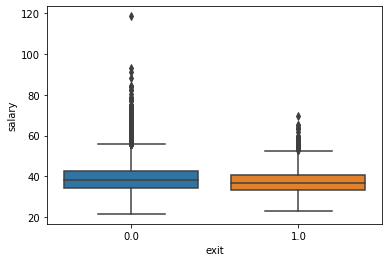

In [49]:
sns.boxplot(data=df, x="exit",y="salary")
plt.show()

Using the function `stats.zscore(df[Column])` compute the z-score table for `salary`. Are there any outliers?

In [50]:
from scipy import stats
Z = stats.zscore(df["salary"],nan_policy="omit") #compute z-score table
print(Z)

0       -1.027337
1       -0.159851
2       -0.533269
3       -0.729882
4       -0.834992
           ...   
18144   -0.018847
18145   -0.612304
18146   -0.205043
18147    1.094852
18148    0.025619
Name: salary, Length: 17250, dtype: float64


What data structure is obtained here? Find the index of the outlier in this case using `np.where` and logical conditions. Do the two indexes correspond?

In [51]:
np.where((Z>3) | (Z<-3))

(array([   10,    19,    94,   293,   315,   329,   429,   544,   745,
          946,   968,  1137,  1186,  1334,  1414,  1550,  1612,  1790,
         1842,  2014,  2038,  2043,  2215,  2223,  2236,  2307,  2472,
         2533,  2556,  2793,  2811,  2922,  3011,  3029,  3103,  3145,
         3147,  3148,  3390,  3472,  3597,  3636,  3639,  3824,  3872,
         3978,  4116,  4357,  4361,  4562,  4668,  4743,  4878,  4960,
         5307,  5388,  5424,  5615,  5650,  5793,  5858,  5954,  5993,
         6305,  6360,  6520,  6535,  6537,  6700,  6906,  6969,  7004,
         7237,  7248,  7278,  7321,  7348,  7643,  7664,  7716,  7767,
         7782,  7839,  7876,  7946,  8046,  8124,  8164,  8470,  8558,
         8578,  8620,  8727,  8785,  8877,  9014,  9251,  9353,  9418,
         9535,  9667,  9762,  9848,  9881, 10172, 10205, 10708, 10709,
        10804, 10895, 10904, 10953, 10957, 10975, 11125, 11295, 11527,
        11575, 11590, 11602, 11736, 11755, 11791, 11895, 12001, 12010,
      

Let's now look at `boss_survey` as `exit` varies:

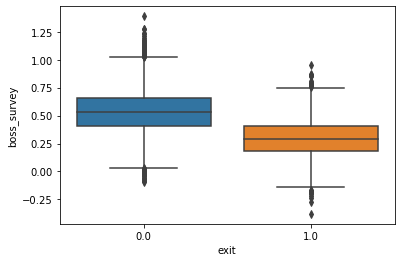

In [52]:
sns.boxplot(data=df, x="exit",y="boss_survey")
plt.show()

Use the function `np.nanquantile(column,quantile)` to find the 5% quantile of `boss_survey` results within the employees exiting the firm. Then, take a look at all of the employees leaving the firm who have a `boss_survey` result at or below this 5% quantile.

In [53]:
df_exiteers=df[df["exit"]==1]
lower_quantile_survey = np.nanquantile(df_exiteers["boss_survey"],0.05)
df_exiteers[df_exiteers["boss_survey"] <= lower_quantile_survey]

,admin_support,age,boss_survey,boss_tenure,city_size,clock_in,core,education,gender,half_day_leaves,...,remote,salary,subordinates,team_size,tenure,tenure_unit,training,variable_pay,years_since_promotion,exit
88,0.0,31.0,-0.054391,3.0,2.2,0.0,0.0,2.0,1.0,4.0,...,1.0,36.589417,0.0,8.0,2.0,1.0,4.0,4.0,3.0,1.0
262,0.0,38.0,0.013097,5.0,6.1,1.0,0.0,1.0,1.0,5.0,...,0.0,34.065552,0.0,7.0,1.0,1.0,2.0,4.0,4.0,1.0
322,2.0,37.0,-0.003843,3.0,4.3,0.0,1.0,1.0,1.0,6.0,...,0.0,45.590973,3.0,9.0,4.0,1.0,2.0,13.0,4.0,1.0
384,1.0,38.0,-0.034561,3.0,9.4,0.0,0.0,1.0,1.0,7.0,...,0.0,44.630638,6.0,10.0,1.0,1.0,2.0,12.0,5.0,1.0
515,0.0,40.0,0.024847,3.0,6.1,1.0,1.0,3.0,0.0,5.0,...,1.0,25.047348,0.0,9.0,1.0,1.0,2.0,2.0,5.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17739,2.0,30.0,-0.063604,3.0,2.2,0.0,1.0,3.0,0.0,3.0,...,0.0,36.488388,3.0,7.0,1.0,1.0,2.0,19.0,4.0,1.0
17746,1.0,39.0,-0.102870,3.0,9.4,0.0,1.0,1.0,1.0,5.0,...,1.0,37.927727,8.0,6.0,2.0,1.0,2.0,14.0,4.0,1.0
17806,0.0,36.0,0.023138,3.0,4.3,0.0,0.0,1.0,0.0,5.0,...,1.0,32.512466,0.0,8.0,2.0,2.0,3.0,2.0,4.0,1.0
17940,0.0,31.0,-0.006378,4.0,0.9,1.0,1.0,1.0,0.0,4.0,...,1.0,33.729248,0.0,9.0,1.0,1.0,2.0,3.0,3.0,1.0


# Part 2: Feature Engineering

## 1. Numerical to Categorical
We start with ordinal then move onto one-hot encoding.

1. Ordinal encoding

In [54]:
from sklearn.preprocessing import OrdinalEncoder

dftest = pd.DataFrame({'size':['small','medium','large','small','large','medium']})
dftest

,size
0,small
1,medium
2,large
3,small
4,large
5,medium


In [55]:
encoder = OrdinalEncoder(categories=[['small','medium','large']]) 
dfnew = encoder.fit_transform(dftest) # transform data
pd.DataFrame(data=dfnew, columns=dftest.columns)

,size
0,0.0
1,1.0
2,2.0
3,0.0
4,2.0
5,1.0


2. One-hot encoding

In [56]:
dftest = pd.DataFrame({'color':['green','red','red','blue','green','red']})
dftest

,color
0,green
1,red
2,red
3,blue
4,green
5,red


In [57]:
pd.get_dummies(dftest,drop_first=True,columns=['color'])

,color_green,color_red
0,1,0
1,0,1
2,0,1
3,0,0
4,1,0
5,0,1


## 2. Feature transforms

In [58]:
dfcopy = df.copy()

Use `.apply(np.log)` to transform the column `salary` of `dfcopy` from itself to the log of itself.

In [59]:
dfcopy['salary'] = dfcopy['salary'].apply(np.log)

Print both df and dfcopy. Check their `salary` column. Has your transform had the effect you wanted?

In [60]:
df

,admin_support,age,boss_survey,boss_tenure,city_size,clock_in,core,education,gender,half_day_leaves,...,remote,salary,subordinates,team_size,tenure,tenure_unit,training,variable_pay,years_since_promotion,exit
0,0.0,41.0,0.456427,3.0,4.3,0.0,0.0,3.0,0.0,5.0,...,1.0,31.823364,0.0,8.0,1.0,1.0,3.0,2.0,3.0,0.0
1,2.0,41.0,0.512982,3.0,9.4,1.0,1.0,1.0,1.0,5.0,...,1.0,37.876808,1.0,5.0,1.0,1.0,2.0,8.0,4.0,0.0
2,0.0,33.0,0.415119,3.0,4.3,1.0,0.0,1.0,0.0,2.0,...,1.0,35.271042,0.0,8.0,1.0,1.0,2.0,2.0,3.0,0.0
3,0.0,35.0,0.467731,4.0,2.2,1.0,1.0,1.0,0.0,3.0,...,0.0,33.899048,0.0,8.0,1.0,1.0,3.0,2.0,3.0,0.0
4,0.0,28.0,0.685366,3.0,2.2,0.0,1.0,1.0,0.0,3.0,...,0.0,33.165573,0.0,6.0,1.0,1.0,2.0,3.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18144,0.0,34.0,0.400860,3.0,2.2,1.0,1.0,1.0,0.0,5.0,...,0.0,38.860756,0.0,6.0,2.0,2.0,3.0,3.0,4.0,1.0
18145,0.0,34.0,0.230811,3.0,6.1,0.0,1.0,2.0,0.0,5.0,...,1.0,34.719528,0.0,8.0,1.0,1.0,3.0,4.0,4.0,0.0
18146,2.0,47.0,0.551863,3.0,6.1,0.0,1.0,3.0,1.0,3.0,...,1.0,37.561455,3.0,10.0,1.0,1.0,3.0,18.0,3.0,0.0
18147,2.0,37.0,0.493113,4.0,0.9,0.0,1.0,1.0,1.0,3.0,...,1.0,46.632317,3.0,5.0,3.0,3.0,3.0,15.0,3.0,0.0


In [61]:
dfcopy

,admin_support,age,boss_survey,boss_tenure,city_size,clock_in,core,education,gender,half_day_leaves,...,remote,salary,subordinates,team_size,tenure,tenure_unit,training,variable_pay,years_since_promotion,exit
0,0.0,41.0,0.456427,3.0,4.3,0.0,0.0,3.0,0.0,5.0,...,1.0,3.460201,0.0,8.0,1.0,1.0,3.0,2.0,3.0,0.0
1,2.0,41.0,0.512982,3.0,9.4,1.0,1.0,1.0,1.0,5.0,...,1.0,3.634339,1.0,5.0,1.0,1.0,2.0,8.0,4.0,0.0
2,0.0,33.0,0.415119,3.0,4.3,1.0,0.0,1.0,0.0,2.0,...,1.0,3.563062,0.0,8.0,1.0,1.0,2.0,2.0,3.0,0.0
3,0.0,35.0,0.467731,4.0,2.2,1.0,1.0,1.0,0.0,3.0,...,0.0,3.523387,0.0,8.0,1.0,1.0,3.0,2.0,3.0,0.0
4,0.0,28.0,0.685366,3.0,2.2,0.0,1.0,1.0,0.0,3.0,...,0.0,3.501512,0.0,6.0,1.0,1.0,2.0,3.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18144,0.0,34.0,0.400860,3.0,2.2,1.0,1.0,1.0,0.0,5.0,...,0.0,3.659985,0.0,6.0,2.0,2.0,3.0,3.0,4.0,1.0
18145,0.0,34.0,0.230811,3.0,6.1,0.0,1.0,2.0,0.0,5.0,...,1.0,3.547302,0.0,8.0,1.0,1.0,3.0,4.0,4.0,0.0
18146,2.0,47.0,0.551863,3.0,6.1,0.0,1.0,3.0,1.0,3.0,...,1.0,3.625978,3.0,10.0,1.0,1.0,3.0,18.0,3.0,0.0
18147,2.0,37.0,0.493113,4.0,0.9,0.0,1.0,1.0,1.0,3.0,...,1.0,3.842294,3.0,5.0,3.0,3.0,3.0,15.0,3.0,0.0


We can also make a graphical comparison:

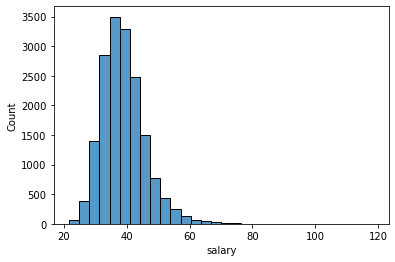

In [62]:
sns.histplot(df["salary"],kde=False,bins=30)
plt.show()

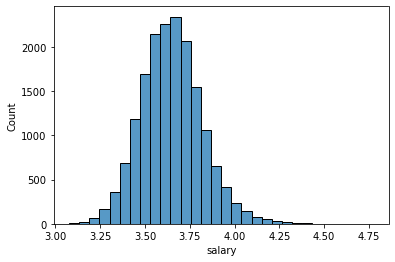

In [63]:
sns.histplot(dfcopy["salary"],kde=False,bins=30)
plt.show()

Create a new feature in the dfcopy dataset consisting of the `boss_tenure_percentage`=`boss_tenure` / `tenure`. Then, print a histogram, using `seaborn`.

In [64]:
dfcopy["boss_tenure_percentage"]=dfcopy["boss_tenure"]/dfcopy["tenure"]

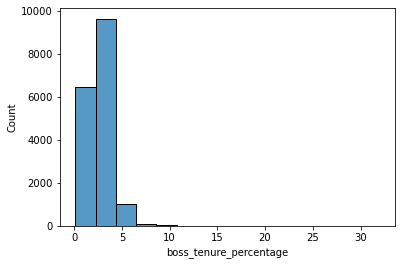

In [65]:
sns.histplot(dfcopy["boss_tenure_percentage"],kde=False,bins=15)
plt.show()

# Part 3: Exercises

## Exercise 1: Iceberg right ahead!

Next term, we will use the Titanic dataset, available at https://www.kaggle.com/c/titanic/data 
This is historic data containing the passengers present on the Titanic and some of their features (whether, e.g., they had family on board or not, their cabin numbers, etc.) and whether or not they survived the boat sinking.
Our goal is to clean up this dataset in view of using it later down the line. The dataset we will be cleaning up is `titanic_train.csv`.

In [66]:
titanic_train=pd.read_csv("titanic_train.csv")

1. Observe the header of the dataset. What do SibSp and Parch represent?

In [67]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


2. Are there any duplicates in the dataset? Why are we doing this before dropping any columns?

In [68]:
titanic_train.duplicated().any()

False

3. Drop a couple of columns from the datasets: PasssengerID, Name, and Ticket Number. We drop Ticket Number and PassengerId as they don't have much informative value. The Name could have some information in it (e.g., nobility, married or not, etc.) but that would require natural language processing, which we will not use on the dataset.

In [69]:
titanic_train = titanic_train.drop(columns=["PassengerId","Name","Ticket"])

In [70]:
titanic_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


4. Let's check for inconsistencies in the numerical data using `.hist()`. Does anything seem abnormal to you?

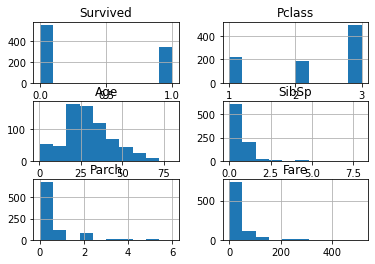

In [71]:
titanic_train.hist()
plt.show()

There may be some outliers but it seems like the values obtained are coherent.

5. What values do the categorical variables (this includes the cabin number) take on? Is there anything irregular there? Make sure you understand their output.

In [72]:
titanic_train["Embarked"].unique()

array(['S', 'C', 'Q', nan], dtype=object)

This corresponds to the port at which the passenger embarked (e.g. S is for Southampton). There seems to be one or more missing values here.

In [73]:
titanic_train["Cabin"].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

This corresponds to the cabin booked by the passenger. Some passengers seem to have booked many cabins at the same time. We check that this is indeed the case by taking a look at the fare paid for e.g. `B57 B59 B63 B66`.

In [74]:
titanic_train[titanic_train["Cabin"]=="B57 B59 B63 B66"]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
311,1,1,female,18.0,2,2,262.375,B57 B59 B63 B66,C
742,1,1,female,21.0,2,2,262.375,B57 B59 B63 B66,C


The fare is considerably more expensive so it tends to show that indeed, it was possible to book many cabins at once. There also seems to be one or more missing values here.

In [75]:
titanic_train["Sex"].unique()

array(['male', 'female'], dtype=object)

There seems to be no issue with this column.

6. We now deal with the missing values. Which features are missing information?

In [76]:
titanic_train.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

There seem to be an awful lot of cabins missing, as well as age, and embarcation port.

7. Which percentage of Age/Cabin/Embarked are missing? Use `.shape` to find this. In consequence, what should you with the Cabin column?

In [77]:
titanic_train.shape

(891, 9)

In [78]:
177/891

0.19865319865319866

In [79]:
687/891

0.7710437710437711

77% of the data in Cabin data is missing: this is a huge amount and probably not a very good predictor. We remove this column.

In [80]:
titanic_train = titanic_train.drop(columns=["Cabin"])

8. For the Age column, we use a nearest neighbor approach. Use `KNNImputer` to fill in the missing values. Check that there are no more missing values in the Age column.

In [81]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=1)
titanic_train[["Age"]] = imputer.fit_transform(titanic_train[["Age"]])

In [82]:
titanic_train.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

9. For the Embarked column, use `countplot` in the `seaborn` package to obtain the number of people who embarked at `S`, `C`, and `Q`. Where did the overwhelming majority of passengers embark? Use `SimpleImputer` to simply replace all missing values with the most frequent one. Check that no more entries are missing.

In [83]:
titanic_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


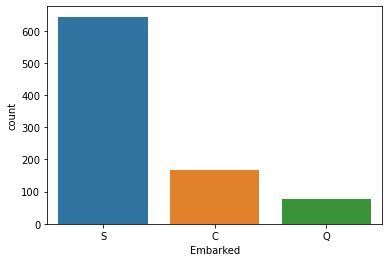

In [84]:
sns.countplot(x="Embarked", data=titanic_train)
plt.show()

In [85]:
from sklearn.impute import SimpleImputer

imp=SimpleImputer(missing_values=np.nan, strategy="most_frequent")
titanic_train[["Embarked"]]=imp.fit_transform(titanic_train[["Embarked"]])

In [86]:
titanic_train.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

10. The division into Parch and SibSp is quite random. We regroup this column into one column called `Family_Presence`. Create a new column in the dataframe called `Family_Presence` which contains 1 if either SibSp is equal to 1 or Parch is equal to 1. Then drop `Parch` and `SibSp`. Hint: Use `np.where(condition,1,0)` where `condition` is the logical condition needed to be satisfied.

In [87]:
titanic_train["Family_Presence"]=np.where((titanic_train["SibSp"]>=1) | (titanic_train["Parch"]>=1), 1,0)

In [88]:
titanic_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family_Presence
0,0,3,male,22.0,1,0,7.2500,S,1
1,1,1,female,38.0,1,0,71.2833,C,1
2,1,3,female,26.0,0,0,7.9250,S,0
3,1,1,female,35.0,1,0,53.1000,S,1
4,0,3,male,35.0,0,0,8.0500,S,0


In [89]:
titanic_train = titanic_train.drop(columns=["SibSp","Parch"])
titanic_train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Family_Presence
0,0,3,male,22.0,7.2500,S,1
1,1,1,female,38.0,71.2833,C,1
2,1,3,female,26.0,7.9250,S,0
3,1,1,female,35.0,53.1000,S,1
4,0,3,male,35.0,8.0500,S,0


11. Finally, replace all categorical variables by numerical ones. We are ready to go!

In [90]:
titanic_train = pd.get_dummies(titanic_train,drop_first=True)
titanic_train.head()

,Survived,Pclass,Age,Fare,Family_Presence,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,7.2500,1,1,0,1
1,1,1,38.0,71.2833,1,0,0,0
2,1,3,26.0,7.9250,0,0,0,1
3,1,1,35.0,53.1000,1,0,0,1
4,0,3,35.0,8.0500,0,1,0,1


## Exercise 2:

Recall the notion of scaling and consider a feature for which we have many observations.

1. Show that if we take the feature vector, subtract its mean and divide by its standard deviation, then the new feature vector obtained is scaled, i.e., has mean 0 and standard deviation 1.

We subtract the mean $\mu$ of the feature vector from $x_i$ and divide by its standard deviation $\sigma$. In this way, each feature has now become $\frac{x_i-\mu}{\sigma}$. 
So, the average of this new feature vector is:
$$\frac{\frac{x_1-\mu}{\sigma}+\ldots+\frac{x_n-\mu}{\sigma}}{n}=\frac{x_1+\ldots+x_n-n \cdot \mu}{n \sigma}=\frac{1}{\sigma}\cdot \left( \frac{x_1+\ldots+x_n}{n} -\mu\right)=\frac{1}{\sigma}\cdot \left( \mu -\mu\right)=0.$$

Recall that the variance of numbers $y_1,\ldots,y_n$ is $$\frac{(y_1-\bar{y})^2+\ldots+(y_n-\bar{y})^2}{n}$$ where $\bar{y}$ is the average or mean of the numbers $y_1,\ldots,y_n$.
Here, we have just shown that the mean of the new feature vector is 0. Hence its variance is given by:
$$\frac{(\frac{x_1-\mu}{\sigma})^2+\ldots+(\frac{x_n-\mu}{\sigma})^2}{n}=\frac{1}{\sigma^2} \cdot \frac{(x_1-\mu)^2+\ldots+(x_n-\mu)^2}{n}=\frac{1}{\sigma^2} var(x_1,...,x_n)=\frac{1}{\sigma^2} \cdot \sigma^2=1.$$
As the standard deviation is the square root of the variance, it follows that the new feature vector has standard deviation one.

2. Check your answer on the first column of the np.array X below:

In [91]:
X = np.array([[ 1., -1.,  2.],
              [ 2.,  0.,  0.],
              [ 0.,  1., -1.]])

In [92]:
(X[:,0]-X[:,0].mean())/(X[:,0].std())
# we get the same thing as when we use the preprocessing library of sklearn

array([ 0.        ,  1.22474487, -1.22474487])

## Exercise 3: Motorcycle Helmets with Bluetooth

See the exercise description within Moodle!

1. We first create the two dataframes.

In [93]:
dict_demand={'Price':[91,74.63,65.06,58.27,53.00],'Demand':[1000,2000,3000,4000,5000]}
df_demand=pd.DataFrame(data=dict_demand)
df_demand

,Price,Demand
0,91.00,1000
1,74.63,2000
2,65.06,3000
3,58.27,4000
4,53.00,5000


In [94]:
dict_supply={'Price':[9,23.21,31.53,37.42,42],'Supply':[1000,2000,3000,4000,5000]}
df_supply=pd.DataFrame(data=dict_supply)
df_supply

,Price,Supply
0,9.00,1000
1,23.21,2000
2,31.53,3000
3,37.42,4000
4,42.00,5000


2. We now plot both dataframes on the same graph using seaborn. We want to plot a scatterplot so we use `sns.lineplot`. The curves do not intersect.

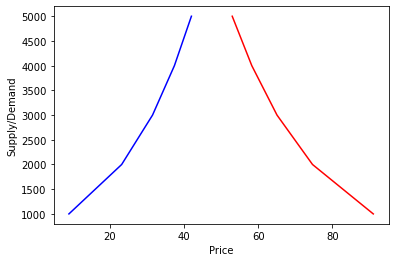

In [95]:
sns.lineplot(x="Price", y="Demand", data=df_demand,color="red");
plot=sns.lineplot(x="Price", y="Supply", data=df_supply,color="blue");
plot.set_ylabel("Supply/Demand")
plt.show()

3. We add a new column to each dataframe by taking the log-transform of the supply/demand.

In [98]:
df_supply["Log_supply"]=df_supply["Supply"].apply(np.log)
df_supply

,Price,Supply,Log_supply
0,9.00,1000,6.907755
1,23.21,2000,7.600902
2,31.53,3000,8.006368
3,37.42,4000,8.294050
4,42.00,5000,8.517193


In [99]:
df_demand["Log_demand"]=df_demand["Demand"].apply(np.log)
df_demand

,Price,Demand,Log_demand
0,91.00,1000,6.907755
1,74.63,2000,7.600902
2,65.06,3000,8.006368
3,58.27,4000,8.294050
4,53.00,5000,8.517193


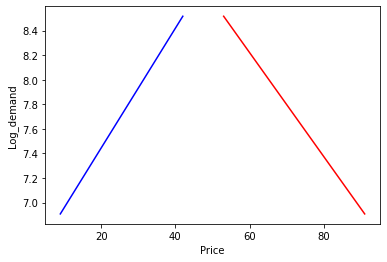

In [100]:
sns.lineplot(x="Price", y="Log_demand", data=df_demand,color="red")
sns.lineplot(x="Price", y="Log_supply", data=df_supply,color="blue")
plt.show()

We get two lines.

4. We can estimate their slopes and intercepts quite easily: slopes=rise/run and intercept=y-axis - slope * x-axis.

In [101]:
#slope of demand:
a=(df_demand["Log_demand"].loc[4]-df_demand["Log_demand"].loc[0])/(df_demand["Price"].loc[4]-df_demand["Price"].loc[0])
print(a)
#intercept of demand
b=df_demand["Log_demand"].loc[4]-a*df_demand["Price"].loc[4]
print(b)

-0.04235362927458162
10.761935542969065


In [102]:
#slope of supply
c=(df_supply["Log_supply"].loc[4]-df_supply["Log_supply"].loc[0])/(df_supply["Price"].loc[4]-df_supply["Price"].loc[0])
print(c)
#intercept of demand
d=df_supply["Log_supply"].loc[4]-c*df_supply["Price"].loc[4]
print(d)

0.0487708458313364
6.46881766650011


5. We can now solve for when they cross by setting $ap+b=cp+d$, i.e., $(a-c)p=d-b$ and so $p=(d-b)/(a-c)$.

In [103]:
p=(d-b)/(a-c)
p

47.11267605633803

6. a. We construct two lists.

In [104]:
L1=np.arange(0,31)/10
L1

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. ])

In [105]:
L2=np.exp(L1)
L2

array([ 1.        ,  1.10517092,  1.22140276,  1.34985881,  1.4918247 ,
        1.64872127,  1.8221188 ,  2.01375271,  2.22554093,  2.45960311,
        2.71828183,  3.00416602,  3.32011692,  3.66929667,  4.05519997,
        4.48168907,  4.95303242,  5.47394739,  6.04964746,  6.68589444,
        7.3890561 ,  8.16616991,  9.0250135 ,  9.97418245, 11.02317638,
       12.18249396, 13.46373804, 14.87973172, 16.44464677, 18.17414537,
       20.08553692])

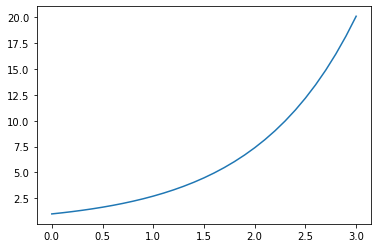

In [106]:
plt.plot(L1,L2)
plt.show()

6.b. The supply curve looks like an exponential function. The demand curve looks like a decreasing exponential function.

6.c. If $D=m\cdot e^{np}$ then taking the logarithm on both sides, 
$$\log(D)=\log(m\cdot e^{np})=\log(m)+\log(e^{np})=\log(m)+np$$ using basic rules of the logarithm and the fact that the exponential and logarithm are inverses of one another. Hence, $\log(D)$ is a linear function of the price $p$ and we have $a=n$ and $\log(m)=b$. A similar reasoning can be applied to $S$.